Sklearn è un tool pieno di modelli precompilati senza bisogno di usare keras o tensorflow per costruirsene uno.
Comodo per problemi noti.





------------------------
0 - Problem understanding
------------------------
abbiamo già studiato il dataset, ma diamoci un'occhiata con pandas
           0          1
0  32.502345  31.707006
1  53.426804  68.777596
il dataset è solo numerico, assumiamo che la colonna zero siano i termini noti (X) mentre le (y) siano le incognite della nostra distribuzione di esempio





diamo un'occhiata alla distribuzione


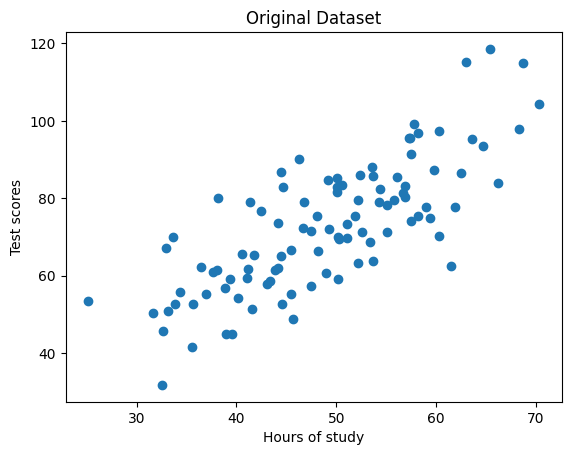

Controlliamo lo shape -> : (100,)
Controlliamo il tipo x <class 'numpy.float64'>
x deve essere una matrice di input con shape (vet_dim, mat_dim) e deve diventare X, usiamo reshape
Creiamo i nostri valori da darein pasto (to feed) al modello in modo che rispettino le regole dell'algebra lineare (rango)




------------------------
1 - Declare Features and target
------------------------
Feature is a matrix X
------------------------
2 split dataset in Training and Test with sklearn built-in function
------------------------
Ricontrolliamo lo shape -> : (100, 1)
Controlliamo il tipo X <class 'numpy.ndarray'>
Ora abbiamo una matrice (vettore nested)




train del modello 'FULL' con tutti i dati


LinearRegression()

Proviamo il modello 'FULL' per recuperare β₀, β₁ regressori
Coefficienti angolari (vettore):  [1.32243102]  di cui la dimensione è  1
Intercetta (scalare secco):  7.991020982270399




------------------------
3 - in real world we need to train the model whith a partition of the problem as we have seen
------------------------
train del modello con una partizione dei dati


LinearRegression()

Proviamo il modello 'TRAIN' per recuperare β₀, β₁ regressori
Coefficienti angolari (vettore):  [1.28944624]  di cui la dimensione è  1
Intercetta (scalare secco):  9.664498626786163




------------------------
4 - creare la predizione sul modello TEST, TRAIN o FULL e plot
------------------------
il modello ci serve per creare una retta (in questo caso di esempio, la più adatta ad approssimare i risultati del nostro esperimento anche per rilevazioni che non abbiamo.
proviamo il modello 'FULL'


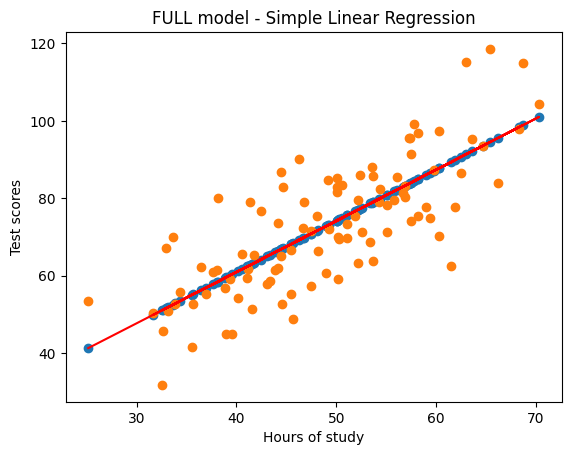

proviamo il modello 'TRAIN'


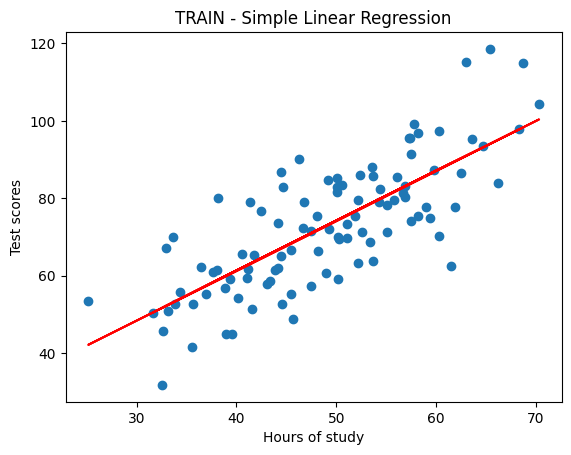

proviamo il modello 'TEST' partendo dal modello 'TRAIN'


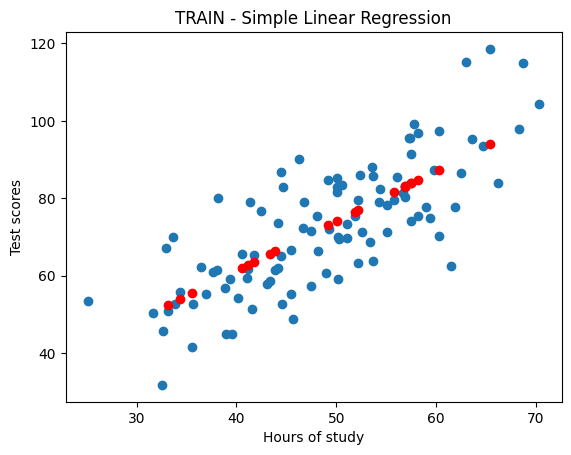

Proviamo a plottare la distribuzione dell'errore assoluto delle previsioni rispetto ai dati reali
errore 'FULL'


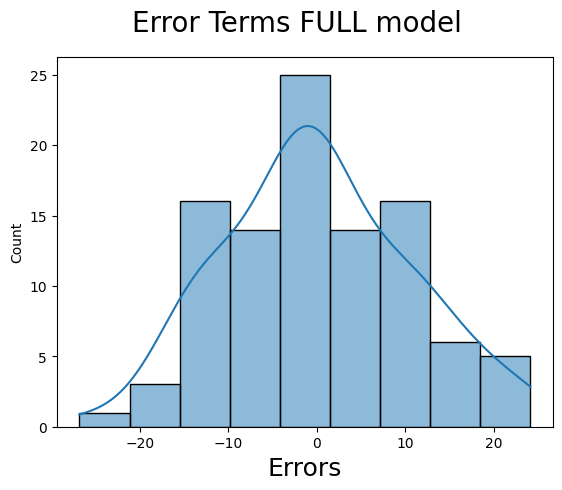

errore 'TRAIN'


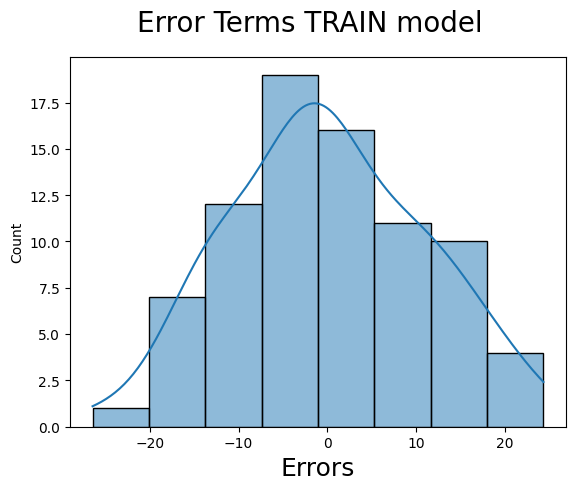

errore 'TEST'


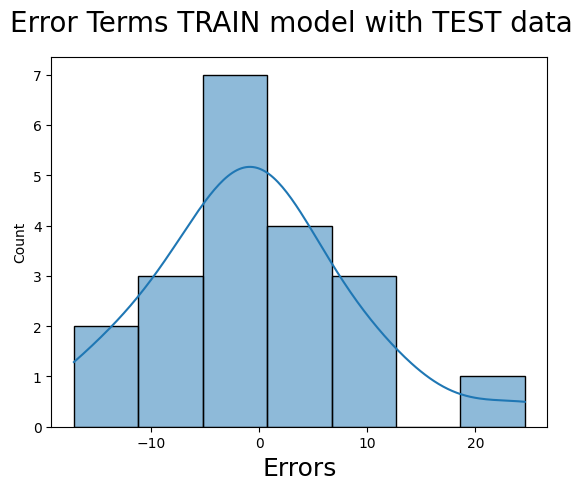





Ora visualizziamo un grafico più interattivo con plotly


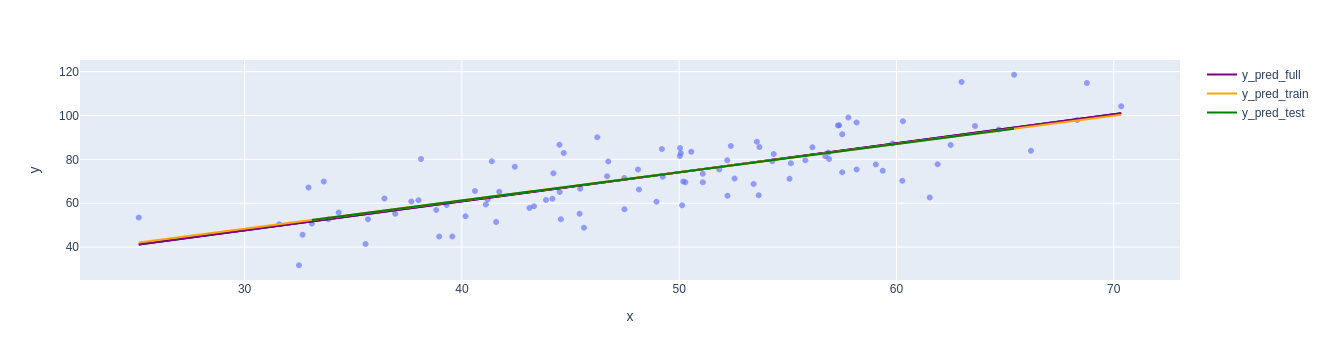

I due modelli non si disconstano molto, questo ci piace




Ora valutiamo la bontà del modello, possiamo solo farlo con il modello TRAIN perchè abbiamo conservato dei dati di paragone
------------------------
5 -  Misurare l'errore del mio modello
------------------------
MAE:  6.781298361926278
MSE:  85.41860729715405
RMSE:  85.41860729715405
R2_score:  0.6805246518467417
Adjusted_R2_score:  0.662776021393783


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# the new one
from sklearn.linear_model import LinearRegression # il modello
from sklearn.model_selection import train_test_split # per trattare i dati
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("\n\n\n")
print("------------------------")
print("0 - Problem understanding")
print("------------------------")


path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/datalr.csv"
points = np.genfromtxt(path, delimiter=',') # att.ne path delimiter se cambia


print("abbiamo già studiato il dataset, ma diamoci un'occhiata con pandas")
df = pd.read_csv(path, header=None)
print(df.head(2))

print("il dataset è solo numerico, assumiamo che la colonna zero siano i termini noti (X) mentre le (y) siano le incognite della nostra distribuzione di esempio\n")

x = np.array(points[:,0]) # prima colonna indice 0
y = np.array(points[:,1]) # seconda colonna indice 1

print("\n\n\n")
print("diamo un'occhiata alla distribuzione")

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Original Dataset')
plt.show()

print("Controlliamo lo shape -> :", x.shape   ) # (100,) # vettore
print("Controlliamo il tipo x" , type(x[0]) ) 

print("x deve essere una matrice di input con shape (vet_dim, mat_dim) e deve diventare X, usiamo reshape" ) # (100,)

print("Creiamo i nostri valori da darein pasto (to feed) al modello in modo che rispettino le regole dell'algebra lineare (rango)")

print("\n\n\n")
print("------------------------")
print("1 - Declare Features and target")
print("------------------------")


print("Feature is a matrix X")
#X = x.reshape(-1, 1) # reashape when features number==1
X = x.reshape(-1, x.size//len(x)) # X--> features
Y = y # non ha senso usare la notazione matriciale !!!!, da qui in avanti verrà ignorata


print("------------------------")
print("2 split dataset in Training and Test with sklearn built-in function")
print("------------------------")

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2,  random_state = 667 )

print("Ricontrolliamo lo shape -> :",  X.shape  ) # (100,1) # matrice
print("Controlliamo il tipo X" ,type(X[0]) ) 
print("Ora abbiamo una matrice (vettore nested)"  ) 

print("\n\n\n")

print("train del modello 'FULL' con tutti i dati")
model_full = LinearRegression()
from IPython.display import display # per visualizzare l'output del modello
display(model_full.fit(X, y))

print("Proviamo il modello 'FULL' per recuperare β₀, β₁ regressori")
print("Coefficienti angolari (vettore): ", model_full.coef_, " di cui la dimensione è " , len(model_full.coef_) ) # retta len 1, piano len 2 iperpiano len 3
print("Intercetta (scalare secco): ", model_full.intercept_) 
print("\n\n\n")
print("------------------------")
print("3 - in real world we need to train the model whith a partition of the problem as we have seen")
print("------------------------")

print("train del modello con una partizione dei dati")
model_train = LinearRegression()
from IPython.display import display # per visualizzare l'output del modello
display(model_train.fit(X_train, y_train))


print("Proviamo il modello 'TRAIN' per recuperare β₀, β₁ regressori")
print("Coefficienti angolari (vettore): ", model_train.coef_, " di cui la dimensione è " , len(model_train.coef_) ) # retta len 1, piano len 2 iperpiano len 3
print("Intercetta (scalare secco): ", model_train.intercept_) 


print("\n\n\n")
print("------------------------")
print("4 - creare la predizione sul modello TEST, TRAIN o FULL e plot")
print("------------------------")
print("il modello ci serve per creare una retta (in questo caso di esempio, la più adatta ad approssimare i risultati del nostro esperimento anche per rilevazioni che non abbiamo.")

print("proviamo il modello 'FULL'")
y_pred_full = model_full.predict(X)
plt.scatter(X,y_pred_full,) # https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.scatter(X,y, ) # default distrib
plt.plot(x, y_pred_full,'-r') # retta
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('FULL model - Simple Linear Regression')
plt.show()

print("proviamo il modello 'TRAIN'")
y_pred_train = model_train.predict(X_train)
plt.scatter(X,y, ) # default distrib
x_train = X_train.reshape(-1) # contrario di reshape
plt.plot(x_train, y_pred_train,'-r') # retta
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('TRAIN - Simple Linear Regression')
plt.show()

print("proviamo il modello 'TEST' partendo dal modello 'TRAIN'")
y_pred_test = model_train.predict(X_test)
plt.scatter(X,y, ) # default distrib
x_test = X_test.reshape(-1) # contrario di reshape
plt.plot(x_test, y_pred_test,'or') # retta
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('TRAIN - Simple Linear Regression')
plt.show()



print("Proviamo a plottare la distribuzione dell'errore assoluto delle previsioni rispetto ai dati reali")
print("errore 'FULL'")
fig = plt.figure()
#sns.distplot((Y - y_pred), bins = 20) # deprecated
sns.histplot((y - y_pred_full), kde=True);
fig.suptitle('Error Terms FULL model', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)
plt.show()


print("errore 'TRAIN'")
fig = plt.figure()
sns.histplot((y_train - y_pred_train), kde=True);
fig.suptitle('Error Terms TRAIN model', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)
plt.show()


print("errore 'TEST'")
fig = plt.figure()
sns.histplot((y_test - y_pred_test), kde=True);
fig.suptitle('Error Terms TRAIN model with TEST data', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)
plt.show()



print("\n\n\n")
print("Ora visualizziamo un grafico più interattivo con plotly")
import plotly.express as px
import plotly.graph_objects as go
# prende in input i vettori e non le matrici
fig = px.scatter(x=x, y=y, opacity=0.65, trendline='ols', trendline_color_override='darkblue', width=800) # default distrib
fig.add_trace(go.Scatter(x=x, y=y_pred_full, mode='lines', name='y_pred_full', line=dict(color='purple'))) # aggiunge la retta del modello lineare
fig.add_trace(go.Scatter(x=x_train, y=y_pred_train, mode='lines', name='y_pred_train', line=dict(color='orange'))) # aggiunge la retta del modello lineare
fig.add_trace(go.Scatter(x=x_test, y=y_pred_test, mode='lines', name='y_pred_test', line=dict(color='green'))) # aggiunge la retta del modello lineare
fig.show()

print("I due modelli non si disconstano molto, questo ci piace")


print("\n\n\n")
print("Ora valutiamo la bontà del modello, possiamo solo farlo con il modello TRAIN perchè abbiamo conservato dei dati di paragone")

print("------------------------")
print("5 -  Misurare l'errore del mio modello")
print("------------------------")

mae = mean_absolute_error(y_test, y_pred_test) # metrica sempre con input y_test da dataset splittato
mse = mean_squared_error(y_test, y_pred_test)
rmse = mean_squared_error(y_test, y_pred_test)
r2score = r2_score(y_test, y_pred_test)

# aggiustato
ad_r2score = 1-(1-r2score)*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1) # confrontare con variabili aggiustato

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2_score: ', r2score)
print('Adjusted_R2_score: ', ad_r2score)